In [1]:
import os
import geopandas as gpd

local_crs = 32636
example_data_path = "./data"

In [2]:
from blocksnet import GraphGenerator

city_geometry = gpd.read_parquet(os.path.join(example_data_path, 'city_geometry.parquet')).to_crs(local_crs)
intermodal_graph = GraphGenerator(city_geometry=city_geometry, local_crs=local_crs).get_graph('intermodal')

/home/vasilstar/masterplanning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Graph made for 'walk' network type
Fetched routes for 'bus'
Graph made for 'bus'
Fetched routes for 'trolleybus'
Graph made for 'trolleybus'
Fetched routes for 'tram'
Graph made for 'tram'
Fetched routes for 'subway'
Graph made for 'subway'


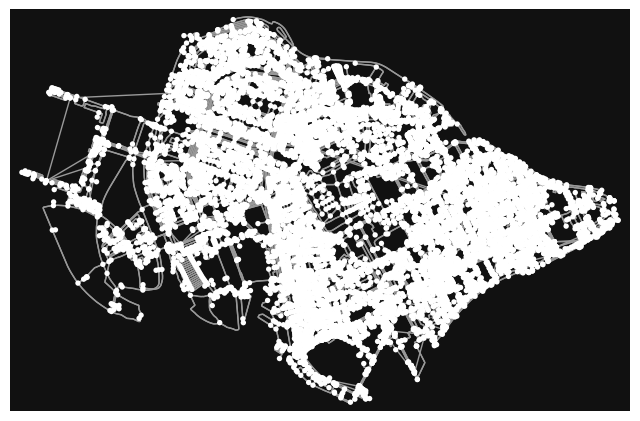

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
import osmnx as ox
ox.plot_graph(intermodal_graph)

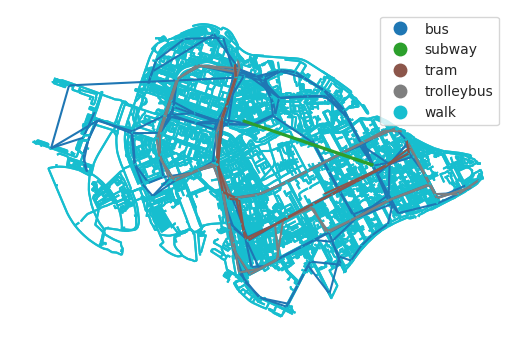

In [4]:
GraphGenerator.plot(intermodal_graph)

In [5]:
blocks = gpd.read_parquet(os.path.join(example_data_path, 'data_getter_blocks.parquet')).to_crs(local_crs)
blocks.head()

,geometry,landuse,block_id,is_living,current_population,floors,current_living_area,current_green_capacity,current_green_area,current_parking_capacity,current_industrial_area,area
0,"POLYGON ((345370.504 6646430.885, 345370.505 6...",no_dev_area,0,False,0.0,1.0,0.0,1874.0,7489.0,2742.0,11750.64068,119540.167840
1,"POLYGON ((345254.667 6647047.217, 345254.667 6...",buildings,1,False,0.0,0.0,0.0,680.0,217.0,0.0,46636.11576,141710.101310
2,"POLYGON ((345055.642 6646758.330, 345055.643 6...",selected_area,2,False,0.0,0.0,0.0,0.0,0.0,0.0,509.50690,4615.595164
3,"POLYGON ((344966.092 6647146.023, 344966.091 6...",no_dev_area,3,False,0.0,1.0,0.0,41.0,9716.0,0.0,37850.73200,103488.493497
4,"POLYGON ((345082.562 6646776.418, 345082.561 6...",buildings,4,False,0.0,0.0,0.0,0.0,0.0,0.0,3353.18100,46883.251448


In [6]:
from blocksnet.preprocessing import DataGetter
dg = DataGetter(blocks=blocks)
mx = dg.get_accessibility_matrix(intermodal_graph)
mx.head()

/home/vasilstar/masterplanning/blocksnet/preprocessing/accs_matrix_calculator.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.blocks.rename(columns={"index": "id"}, inplace=True)


id,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,9.1,17.6,24.0,17.3,18.9,25.1,12.1,28.0,14.5,...,36.7,33.9,29.9,32.6,31.1,28.5,28.8,27.1,25.2,27.9
1,9.1,0.0,17.9,24.3,17.6,19.2,26.9,12.7,28.3,14.8,...,40.9,38.1,31.9,34.6,33.1,30.5,30.8,29.4,27.2,30.2
2,17.6,17.9,0.0,11.4,0.6,6.3,15.5,12.5,15.4,13.1,...,44.3,41.5,36.1,38.8,37.3,34.7,35.0,33.6,31.4,34.4
3,24.0,24.3,11.4,0.0,11.1,7.6,15.0,18.9,9.6,19.5,...,50.7,47.9,42.5,45.2,43.7,41.1,41.4,40.0,37.8,40.8
4,17.3,17.6,0.6,11.1,0.0,6.0,15.2,12.2,15.1,12.8,...,44.0,41.2,35.8,38.5,37.0,34.4,34.7,33.3,31.1,34.1


In [7]:
from blocksnet.models import City

city_model = City(
  blocks_gdf=blocks, 
  matrix=mx, 
)

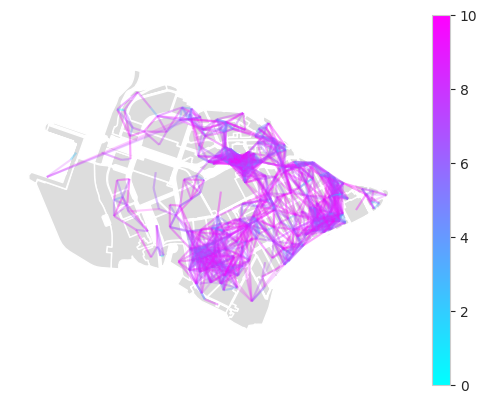

In [15]:
city_model.plot(10)

In [19]:
tyumen = ox.geocode_to_gdf('Tyumen')

In [21]:
intermodal_graph = GraphGenerator(city_geometry=tyumen).get_graph('intermodal')

City geometry CRS set to EPSG:32641
Graph made for 'walk' network type
Fetched routes for 'bus'
Graph made for 'bus'
Fetched routes for 'trolleybus'
Graph made for 'trolleybus'
Fetched routes for 'tram'
Graph made for 'tram'
Fetched routes for 'subway'
Graph made for 'subway'


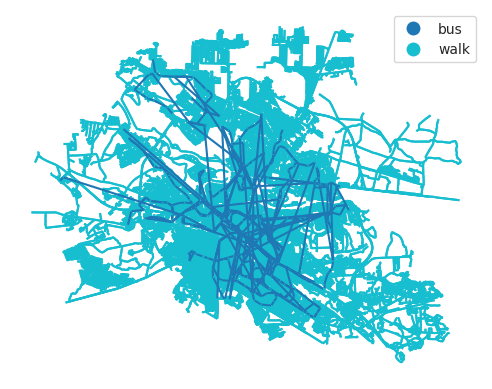

In [22]:
GraphGenerator.plot(intermodal_graph)